<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [15]:
print(df.shape)
print(f'-'*100)
print(df.columns)
print(f'-'*100)
print(df.dtypes)
print(f'-'*100)
print(df.describe())

(65437, 114)
----------------------------------------------------------------------------------------------------
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
----------------------------------------------------------------------------------------------------
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
----------------------------

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [22]:
df.isna().sum().sort_index(ascending=False)

YearsCodePro               8027
YearsCode                   268
WorkExp                   28170
WebframeWantToWorkWith    20183
WebframeHaveWorkedWith    13867
                          ...  
AIEthics                  17585
AIComplex                 22879
AIChallenges              21192
AIBen                     23097
AIAcc                     22667
Length: 114, dtype: int64

In [21]:
df.dropna(subset=['Country', 'LanguageHaveWorkedWith'], inplace=True)

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [27]:
df[['Employment', 'JobSat', 'YearsCodePro']].isnull().sum()

Employment          0
JobSat          28682
YearsCodePro     8027
dtype: int64

In [28]:
df[['Employment', 'JobSat', 'YearsCodePro']].dropna(inplace=True)

C:\Users\Imane\AppData\Local\Temp\ipykernel_30084\2264642088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Employment', 'JobSat', 'YearsCodePro']].dropna(inplace=True)


In [35]:
employment_counts = df['Employment'].value_counts()
jobsat_counts = df['JobSat'].value_counts()
years_codepro_counts = df['YearsCodePro'].value_counts()

employment_counts_df = employment_counts.reset_index().rename(columns={'index': 'Employment', 'Employment': 'Count'})
jobsat_counts_df = jobsat_counts.reset_index().rename(columns={'index': 'JobSat', 'JobSat': 'Count'})
years_codepro_counts_df = years_codepro_counts.reset_index().rename(columns={'index': 'YearsCodePro', 'YearsCodePro': 'Count'})

print("Top Employment Types:")
print(employment_counts.head(10))
print(f'-'*100)
print("\nTop Job Satisfaction Levels:")
print(jobsat_counts.head(10))
print(f'-'*100)
print("\nTop Years of Professional Coding Experience:")
print(years_codepro_counts.head(10))

Top Employment Types:
Employment
Employed, full-time                                                         34676
Independent contractor, freelancer, or self-employed                         4351
Student, full-time                                                           4026
Employed, full-time;Independent contractor, freelancer, or self-employed     3226
Not employed, but looking for work                                           2010
Employed, part-time                                                          1049
Student, full-time;Employed, part-time                                        982
Employed, full-time;Student, full-time                                        762
Employed, full-time;Student, part-time                                        728
Student, full-time;Not employed, but looking for work                         612
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

Top Job Satisfactio

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


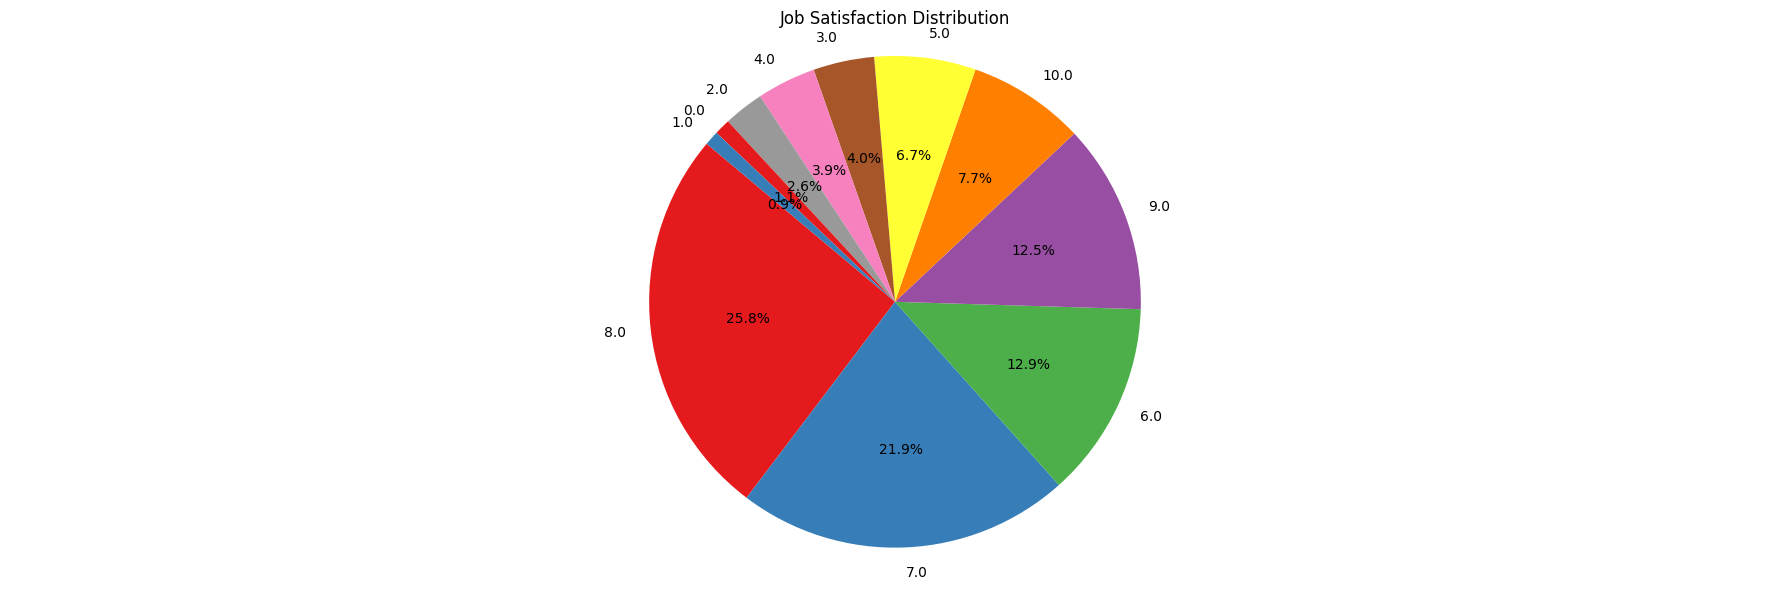

In [ ]:
jobsat_count = df['JobSat'].value_counts()

plt.figure(figsize=(18, 6))
plt.pie(jobsat_count, labels=jobsat_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1", len(jobsat_count)))
plt.title('Job Satisfaction Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


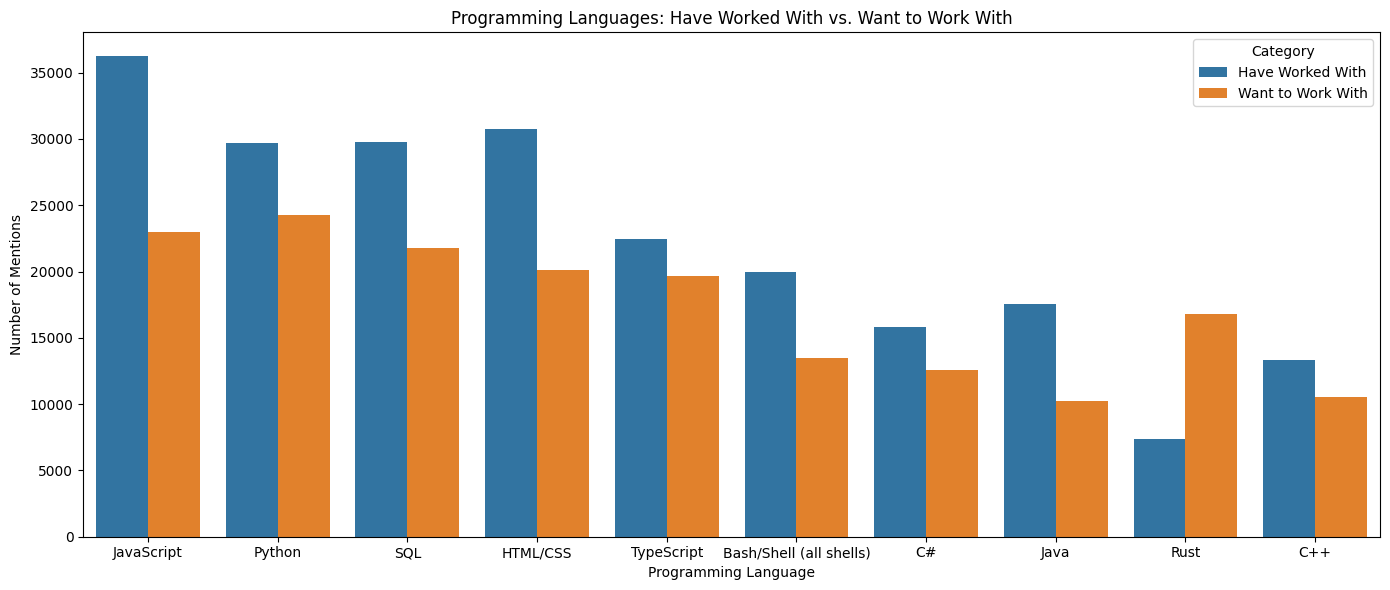

In [ ]:
from collections import Counter

have_worked = df['LanguageHaveWorkedWith'].dropna().str.split(';')
want_to_work = df['LanguageWantToWorkWith'].dropna().str.split(';')

have_flat = [lang.strip() for sublist in have_worked for lang in sublist]
want_flat = [lang.strip() for sublist in want_to_work for lang in sublist]

have_counts = Counter(have_flat)
want_counts = Counter(want_flat)

all_languages = set(have_counts.keys()).union(set(want_counts.keys()))

lang_data = []
for lang in all_languages:
    lang_data.append({
        'Language': lang,
        'Have Worked With': have_counts.get(lang, 0),
        'Want to Work With': want_counts.get(lang, 0)
    })

lang_df = pd.DataFrame(lang_data)


lang_df['Total'] = lang_df['Have Worked With'] + lang_df['Want to Work With']
lang_df = lang_df.sort_values('Total', ascending=False).head(10)

melted_df = pd.melt(lang_df, id_vars='Language', value_vars=['Have Worked With', 'Want to Work With'],
                    var_name='Category', value_name='Count')

plt.figure(figsize=(14,6))
sns.barplot(data=melted_df, x='Language', y='Count', hue='Category')
plt.title('Programming Languages: Have Worked With vs. Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [68]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    20526
Remote                                  18880
In-person                                9235
Name: count, dtype: int64

In [76]:
df['RemoteWork'] = df['RemoteWork'].replace({'Hybrid (some remote, some in-person)': 'Hybrid',
                                            'Fully remote': 'Remote'})

In [78]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid       20526
Remote       18880
In-person     9235
Name: count, dtype: int64

                                               Country  Count
147                           United States of America   4695
143                                            Ukraine   1709
50                                             Germany   1187
145  United Kingdom of Great Britain and Northern I...   1141
26                                              Canada    891
60                                               India    834
110                                             Poland    707
20                                              Brazil    705
127                                              Spain    497
47                                              France    406


C:\Users\Imane\AppData\Local\Temp\ipykernel_30084\2401974711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= remote_by_country.head(10), x='Count', y='Country', palette='viridis')


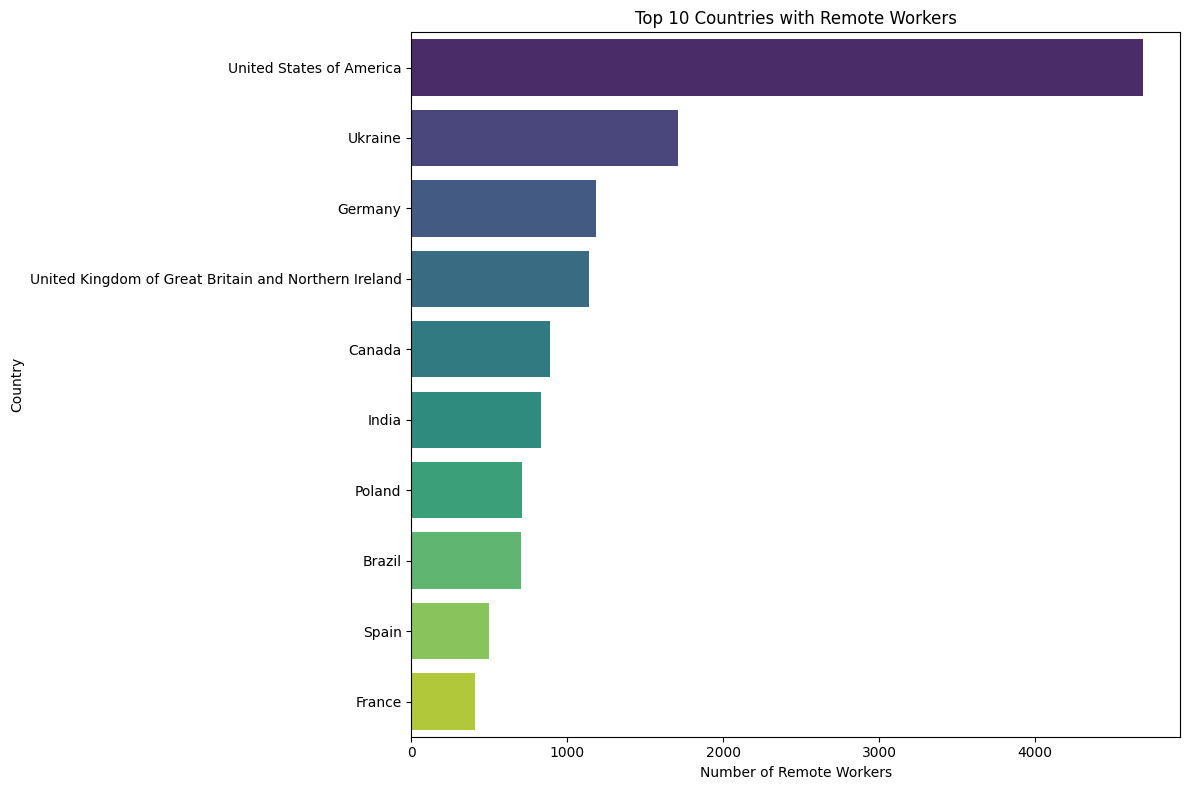

In [84]:
remote_only = df[df['RemoteWork'] == 'Remote']
remote_by_country = remote_only.groupby('Country').size().reset_index(name='Count')
remote_by_country = remote_by_country.sort_values('Count', ascending=False)
print(remote_by_country.head(10))


plt.figure(figsize=(12, 8))
sns.barplot(data= remote_by_country.head(10), x='Count', y='Country', palette='viridis')
plt.title('Top 10 Countries with Remote Workers') 
plt.xlabel('Number of Remote Workers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [108]:
from scipy.stats import pearsonr, spearmanr

def convert_years(x):
    if isinstance(x, str):
        x = x.strip()
        if x.lower() == 'less than 1 year':
            return 0.5
        elif x.lower() == 'more than 50 years':
            return 50
        try:
            return float(x)
        except:
            return None
    return x

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years)

cor_df = df[['JobSat', 'YearsCodePro_num']].dropna()

pearson_corr, p_pearson = pearsonr(cor_df['YearsCodePro_num'], cor_df['JobSat'])
spearman_corr, p_spearman = spearmanr(cor_df['YearsCodePro_num'], cor_df['JobSat'])

print(f"Pearson Correlation: {pearson_corr:.3f} (p = {p_pearson:.3g})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p = {p_spearman:.3g})")

Pearson Correlation: 0.104 (p = 1.11e-68)
Spearman Correlation: 0.119 (p = 3.17e-89)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [109]:
employment_map = {
    'Employed, full-time': 'Employed (FT)',
    'Employed, part-time': 'Employed (PT)',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Student, full-time': 'Student (FT)',
    'Student, part-time': 'Student (PT)',
    'Not employed, but looking for work': 'Unemployed - Seeking',
    'Not employed, not looking for work': 'Unemployed - Not Seeking',
    'Retired': 'Retired',
    'I prefer not to say': 'Prefer not to say'
}
df['EmploymentSimplified'] = df['Employment'].map(employment_map).fillna('Other')

education_map = {
    "Primary/elementary school": "Primary School",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School",
    "Some college/university study without earning a degree": "Some College",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Bachelorʼs degree (B.A., B.S., B.Eng., etc.)": "Bachelor's",
    "Master's degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional Degree",
    "Something else": "Other"
}

df['EdLevelSimplified'] = df['EdLevel'].map(education_map).fillna('Other')


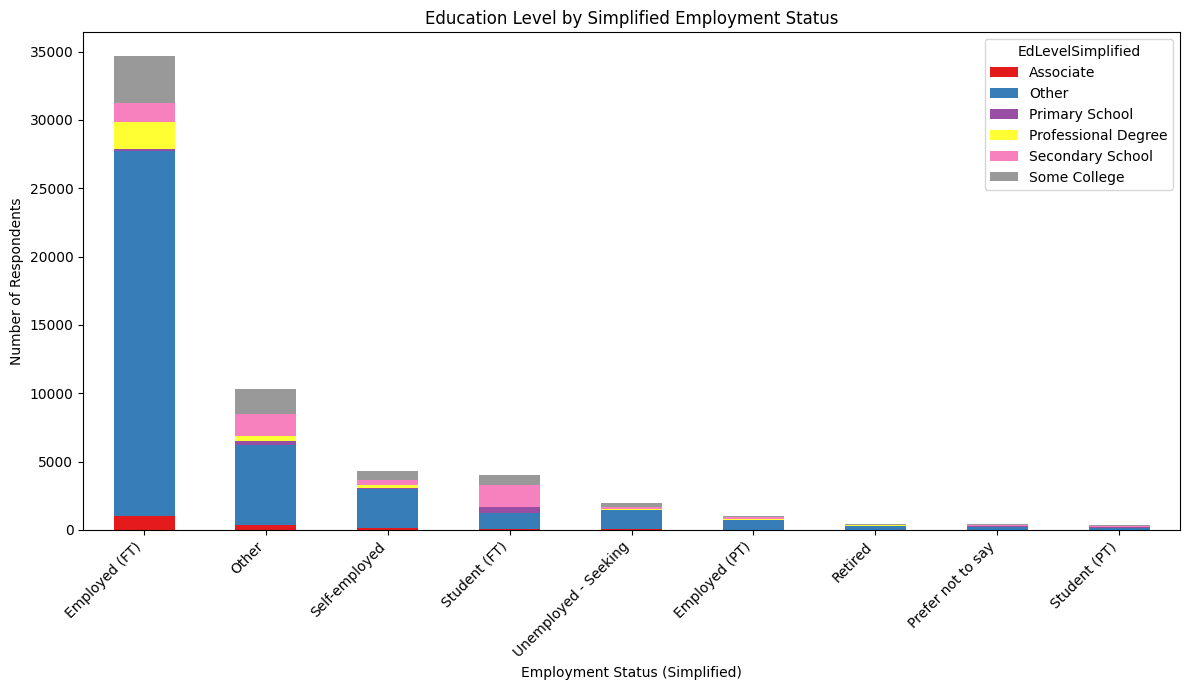

In [112]:
emp_edu_df = pd.crosstab(df['EmploymentSimplified'], df['EdLevelSimplified'])

emp_edu_df['Total'] = emp_edu_df.sum(axis=1)
top10 = emp_edu_df.sort_values('Total', ascending=False).drop(columns='Total').head(10)

top10.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set1')
plt.title('Education Level by Simplified Employment Status')
plt.xlabel('Employment Status (Simplified)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [113]:
df.to_csv('8.Survey_Data_Cleaned.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
